In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import string

In [2]:
df = pd.read_csv('final502.csv')
df.head(100)



,ngram,y1800,y1810,y1820,y1830,y1840,y1850,y1860,y1870,y1880,...,y1910,y1920,y1930,y1940,y1950,y1960,y1970,y1980,y1990,y2000
0,! Lord,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.001
1,"\\""\"" About\""""",0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.007,0.007,0.009,0.010,0.009,0.008,0.007,0.009,0.012,0.022
2,"\\""\"" Always\""""",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.002,0.002,0.003,0.003,0.003,0.002,0.002,0.002,0.003,0.006
3,"\\""\"" Anna\""""",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.001,0.001,0.003,0.004,0.003,0.003,0.002,0.004,0.006,0.010
4,"\\""\"" Applied\""""",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"\Cutting""",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
96,"\Dido""",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
97,"\Diller""",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
98,"\Disability""",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [3]:
df['ngram'] = df['ngram'].str.replace(r'[^\w?\s?\w$]', '')
df['ngram'] = df['ngram'].str.replace(r'[\d]', '')
df['ngram'] = df['ngram'].str.replace(r'[^a-zA-Z0-9]', '')
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.replace(" ", nan_value, inplace=True)
df = df.dropna()
df = df.set_index('ngram')

In [4]:
df = df.groupby(level=0).sum()

In [5]:
top_20_ngram = df.sum(axis=1).sort_values()[-20:]
top_20_ngram

ngram
it       9.273
he       9.364
Itis     9.659
What     9.996
is      10.053
The     11.484
No      12.207
but     12.500
a       12.964
them    12.975
Mr      13.519
I       13.978
you     14.455
to      15.429
that    16.007
of      19.456
in      21.121
the     26.706
and     30.465
NAME    83.151
dtype: float64

In [6]:
top_20_ngram = list(top_20_ngram.index)
top_20_ngram

['it',
 'he',
 'Itis',
 'What',
 'is',
 'The',
 'No',
 'but',
 'a',
 'them',
 'Mr',
 'I',
 'you',
 'to',
 'that',
 'of',
 'in',
 'the',
 'and',
 'NAME']

/Users/xiyuchen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


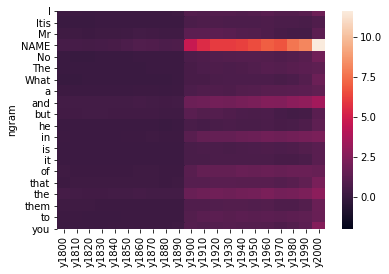

In [7]:
import seaborn as sns
sns.heatmap(df[df.index.isin(top_20_ngram)], vmin=-2)
plt.show()

In [8]:
bottom_20_ngram = df.sum(axis=1).sort_values()
bottom_20_ngram = bottom_20_ngram[bottom_20_ngram>0]
bottom_20_ngram = list(bottom_20_ngram[0:20].index)
bottom_20_ngram

['thesauna',
 'otherphysicians',
 'yoursor',
 'laughednervously',
 'wouldmelt',
 'dneeded',
 'muchwiser',
 'DeLeon',
 'yourpassport',
 'theSenecas',
 'othersenior',
 'Michaellooked',
 'andZoe',
 'theaviation',
 'muchwhether',
 'coursewithout',
 'ofsticky',
 'dlanded',
 'theirbayonets',
 'anticipatedthis']

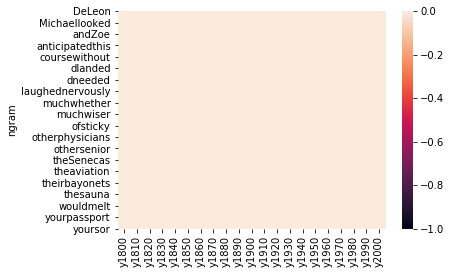

In [9]:
sns.heatmap(df[df.index.isin(bottom_20_ngram)], vmin=-1)
plt.show()

In [10]:
from wordcloud import WordCloud 

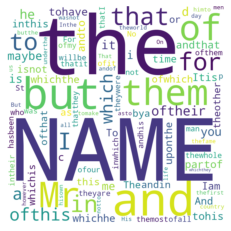

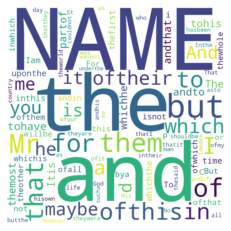

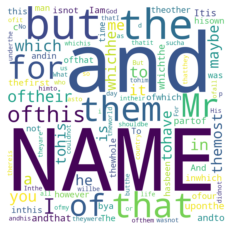

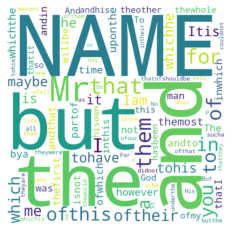

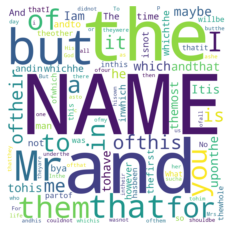

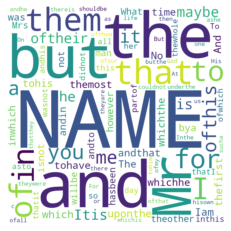

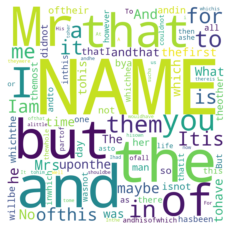

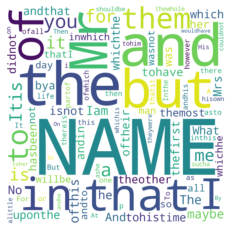

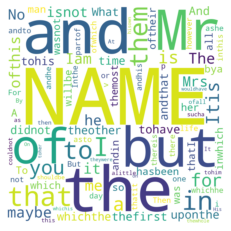

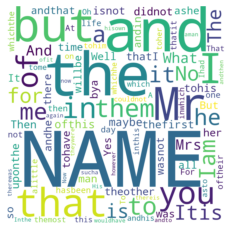

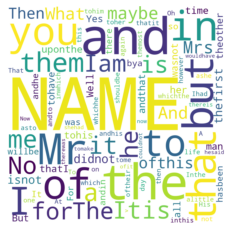

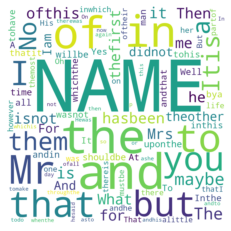

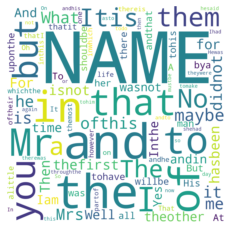

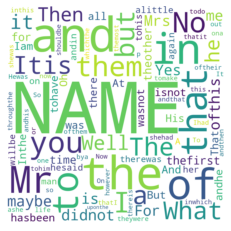

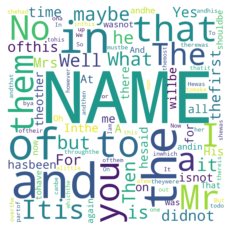

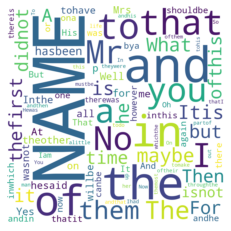

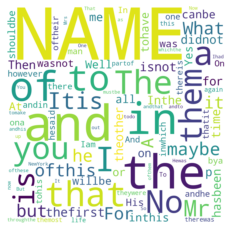

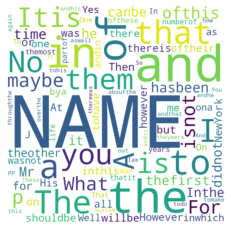

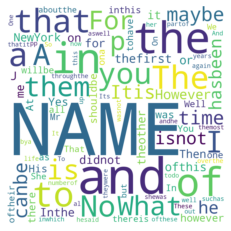

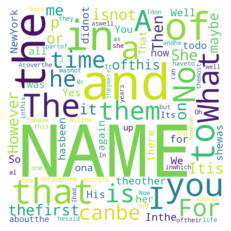

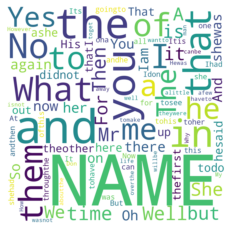

In [11]:
for col in df:
    wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(df[col])
    plt.figure() 
    plt.imshow(wc, interpolation="bilinear") 
    plt.axis("off") 
    plt.margins(x=0, y=0) 
    plt.show()
    

In [15]:
from nltk.corpus import stopwords

In [24]:
words = list(df.sum(axis=1).sort_values()[-100:].index)

In [27]:
words

['girl',
 'would',
 'sincethe',
 'Therewere',
 'likethat',
 'theyear',
 'rightto',
 'inyour',
 'necessaryto',
 'thequestion',
 'last',
 'thetown',
 'werein',
 'anyof',
 'forthat',
 'Your',
 'wehad',
 'Ididn',
 'above',
 'hours',
 'theback',
 'truth',
 'isn',
 'aftera',
 'called',
 'tomeet',
 'Lord',
 'forsome',
 'atthat',
 'awoman',
 'withits',
 'restof',
 'thatif',
 'beable',
 'orto',
 'thepast',
 'century',
 'towork',
 'mean',
 'nearthe',
 'andone',
 'whatyou',
 'natureof',
 'amore',
 'Many',
 'youthink',
 'Our',
 'ifshe',
 'myown',
 'foran',
 'III',
 'howto',
 'onto',
 'butthey',
 'themorning',
 'doesn',
 'atime',
 'Finally',
 'ofbeing',
 'hima',
 'tbe',
 'though',
 'whois',
 'G',
 'theAmerican',
 'point',
 'befound',
 'present',
 'W',
 'thave',
 'herself',
 'withthem',
 'city',
 'hereyes',
 'ontheir',
 'toall',
 'membersof',
 'left',
 'hadcome',
 'thesun',
 'whenit',
 'Or',
 'anything',
 'wenton',
 'lookat',
 'themiddle',
 'dead',
 'Ofcourse',
 'Andthe',
 'Forthe',
 'sofar',
 'answ